# Proyek Analisis Data: E-Commerce Dataset
- **Nama:** Keysya Alifia Zabina
- **Email:** keysyaalifiazabina@gmail.com
- **ID Dicoding:** keysya_alifia_zabina

## Menentukan Pertanyaan Bisnis

- Produk apa saja yang paling laris dan tidak laris dalam penjulan?
- Kategori produk apa yang paling banyak dibeli?
- Bagaimana penjualan dan Revenue Perusahaan dalam Beberapa Bulan Terakhir?
- Bagaimana Demografis Customer yang Dimiliki?
- Seller kota mana yang menjual produk paling banyak?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
customers_df = pd.read_csv("customers_dataset.csv")
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [3]:
geolocation_df = pd.read_csv("geolocation_dataset.csv")
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [4]:
order_items_df = pd.read_csv("order_items_dataset.csv")
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [5]:
order_payments_df = pd.read_csv("order_payments_dataset.csv")
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [6]:
order_reviews_df = pd.read_csv("order_reviews_dataset.csv")
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [7]:
orders_df = pd.read_csv("orders_dataset.csv")
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [8]:
product_category_df = pd.read_csv("product_category_name_translation.csv")
product_category_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [9]:
products_df = pd.read_csv("products_dataset.csv")
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [10]:
sellers_df = pd.read_csv("sellers_dataset.csv")
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


**Insight:**
- xxx
- xxx

### Assessing Data

In [11]:
customers_df.info()
customers_df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


,0
customer_id,0
customer_unique_id,0
customer_zip_code_prefix,0
customer_city,0
customer_state,0


In [12]:
print("Jumlah duplikasi: ", customers_df.duplicated().sum())
customers_df.describe()

Jumlah duplikasi:  0


,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


In [13]:
geolocation_df.info()
geolocation_df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


,0
geolocation_zip_code_prefix,0
geolocation_lat,0
geolocation_lng,0
geolocation_city,0
geolocation_state,0


In [14]:
print("Jumlah duplikasi: ", geolocation_df.duplicated().sum())
geolocation_df.describe()

Jumlah duplikasi:  261831


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


**Insight:**

- Terdapat adanya duplikasi

In [15]:
order_items_df.info()
order_items_df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


,0
order_id,0
order_item_id,0
product_id,0
seller_id,0
shipping_limit_date,0
price,0
freight_value,0


**Insight:**
- Data type shipping_limit_date harusnya datetime

In [16]:
print("Jumlah duplikasi: ", order_items_df.duplicated().sum())
order_items_df.describe()

Jumlah duplikasi:  0


,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


In [17]:
order_payments_df.info()
order_payments_df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


,0
order_id,0
payment_sequential,0
payment_type,0
payment_installments,0
payment_value,0


**Insight:**
- xxx
- xxx

In [18]:
print("Jumlah duplikasi: ", order_payments_df.duplicated().sum())
order_payments_df.describe()

Jumlah duplikasi:  0


,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


In [19]:
order_reviews_df.info()
order_reviews_df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


,0
review_id,0
order_id,0
review_score,0
review_comment_title,87656
review_comment_message,58247
review_creation_date,0
review_answer_timestamp,0


**Insight:**
- Terdapat missing value pada review_comment_title dan review_comment_message.
- Adanya data type yang tidak cocok pada review_creation_date dan review_answer_timestamp

In [20]:
print("Jumlah duplikasi: ", order_reviews_df.duplicated().sum())
order_reviews_df.describe()

Jumlah duplikasi:  0


,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [21]:
orders_df.info()
orders_df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


**Insight:**
- Data type tidak sesuai pada order_approved_at, order_delivered_carrier_date dan order_delivered_customer_date

In [22]:
print("Jumlah duplikasi: ", orders_df.duplicated().sum())
orders_df.describe()

Jumlah duplikasi:  0


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


In [23]:
product_category_df.info()
product_category_df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


,0
product_category_name,0
product_category_name_english,0


In [24]:
print("Jumlah duplikasi: ", product_category_df.duplicated().sum())
product_category_df.describe()

Jumlah duplikasi:  0


,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


In [25]:
products_df.info()
products_df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


,0
product_id,0
product_category_name,610
product_name_lenght,610
product_description_lenght,610
product_photos_qty,610
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2


**Insight:**
- Missing value pada product_category_name, product_name_lenght, product_description_lenght, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, dan product_width_cm

In [26]:
print("Jumlah duplikasi: ", products_df.duplicated().sum())
products_df.describe()

Jumlah duplikasi:  0


,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [27]:
sellers_df.info()
sellers_df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


,0
seller_id,0
seller_zip_code_prefix,0
seller_city,0
seller_state,0


In [28]:
print("Jumlah duplikasi: ", sellers_df.duplicated().sum())
sellers_df.describe()

Jumlah duplikasi:  0


,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


### Cleaning Data

Cleaning geolocation yang terdapat adanya duplicate, dengan drop duplicate

In [29]:
geolocation_df.drop_duplicates(inplace=True)

In [30]:
geolocation_df.duplicated().sum()

0

Mengubah data type untuk shipping_limit_date menjadi datetime

In [31]:
datetime_columns = ["shipping_limit_date"]

for column in datetime_columns:
  order_items_df[column] = pd.to_datetime(order_items_df[column])

In [32]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


Menangani missing value pada review_comment_title dan review_comment_message

In [33]:
order_reviews_df[order_reviews_df.review_comment_title.isna()]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13


In [34]:
order_reviews_df[order_reviews_df.review_comment_message.isna()]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
5,15197aa66ff4d0650b5434f1b46cda19,b18dcdf73be66366873cd26c5724d1dc,1,NaN,NaN,2018-04-13 00:00:00,2018-04-16 00:39:37
6,07f9bee5d1b850860defd761afa7ff16,e48aa0d2dcec3a2e87348811bcfdf22b,5,NaN,NaN,2017-07-16 00:00:00,2017-07-18 19:30:34
...,...,...,...,...,...,...,...
99217,c6b270c61f67c9f7cb07d84ea8aeaf8b,48f7ee67313eda32bfcf5b9c1dd9522d,5,NaN,NaN,2017-12-13 00:00:00,2017-12-14 11:09:36
99218,af2dc0519de6e0720ef0c74292fb4114,d699c734a0b1c8111f2272a3f36d398c,5,NaN,NaN,2018-04-27 00:00:00,2018-04-30 01:18:57
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42


In [35]:
order_reviews_df.review_comment_title.value_counts()

,count
review_comment_title,
Recomendo,423
recomendo,345
Bom,293
super recomendo,270
Excelente,248
...,...
Luminaria sobrepor led 18,1
Não recebi.,1
produto com lacre violado,1


In [36]:
order_reviews_df.review_comment_message.value_counts()

,count
review_comment_message,
Muito bom,230
Bom,189
muito bom,122
bom,107
Recomendo,100
...,...
PRODUTO FOI ENTREGUE VIA CORREIOS\r\nANTES DO PRAZO PREVISTO.,1
"Devido incompatibilidade vou devolver, ótimo produto!",1
Infelizmente não! A qualidade do produto não agradou.Impressão da foto em exposição remete a um tamanho maior e a recebida sequer atende a uma criança. PRODUTO NÃO JUSTIFICA O VALOR INFELIZMENTE!,1


Karena keduanya memiliki arti yang sama yaitu menambahkan komentar terhadap feedback, oleh karena itu replace missing value dengan "No Review Comment"

In [37]:
order_reviews_df.fillna(value="No Review Comment", inplace=True)

In [38]:
order_reviews_df.isna().sum()

,0
review_id,0
order_id,0
review_score,0
review_comment_title,0
review_comment_message,0
review_creation_date,0
review_answer_timestamp,0


Mengganti data type review_creation_date dan review_answer_timestamp

In [39]:
datetime_columns = ['review_creation_date', 'review_answer_timestamp']

for column in datetime_columns:
  order_reviews_df[column] = pd.to_datetime(order_reviews_df[column])

In [40]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     99224 non-null  object        
 4   review_comment_message   99224 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


Mengganti data type pada orders

In [41]:
datetime_columns=['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date'
]
for columns in datetime_columns:
    orders_df[columns]=pd.to_datetime(orders_df[columns])

In [42]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


Langkah selanjutnya ialah menangani missing value pada product. Disini kita bisa menggunakan dropping untuk menghapus data yang dinilai tidak terlalu penting. Disini kita akan drop beberapa data yakni product_name_lenght dan product_description_lenght.

In [43]:
drop_coloumn = ['product_name_lenght', 'product_description_lenght']
products_df.drop(drop_coloumn, axis= 1, inplace= True)

In [44]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   product_id             32951 non-null  object 
 1   product_category_name  32341 non-null  object 
 2   product_photos_qty     32341 non-null  float64
 3   product_weight_g       32949 non-null  float64
 4   product_length_cm      32949 non-null  float64
 5   product_height_cm      32949 non-null  float64
 6   product_width_cm       32949 non-null  float64
dtypes: float64(5), object(2)
memory usage: 1.8+ MB


Selanjutnya kita mengisi nilai missing value, disini masih terdapat adanya missing value.

In [45]:
products_df[products_df.product_category_name.isna()]

,product_id,product_category_name,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,NaN,NaN,1300.0,45.0,16.0,45.0


Mengganti nilai missing value pada product_category_name dengan modus/nilai yang sering muncul.

In [46]:
products_df['product_category_name'].fillna(products_df['product_category_name'].mode()[0], inplace=True)

<ipython-input-46-518f44aaf083>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  products_df['product_category_name'].fillna(products_df['product_category_name'].mode()[0], inplace=True)


Mengganti nilai product_photos_qty dengan mean/rata-rata.

In [47]:
products_df["product_photos_qty"].fillna(value=products_df["product_photos_qty"].mean(), inplace=True)

<ipython-input-47-1972ba17e265>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  products_df["product_photos_qty"].fillna(value=products_df["product_photos_qty"].mean(), inplace=True)


Mengganti nilai product_weight_g dengan mean/rata-rata, mengganti nilai product_length_cm, product_height_cm dan product_width_cm dengan median/nilai tengah.

In [48]:
products_df["product_weight_g"].fillna(value=products_df["product_weight_g"].mean(), inplace=True)
products_df["product_length_cm"].fillna(value=products_df["product_length_cm"].median(), inplace=True)
products_df["product_height_cm"].fillna(value=products_df["product_height_cm"].median(), inplace=True)
products_df["product_width_cm"].fillna(value=products_df["product_width_cm"].median(), inplace=True)

<ipython-input-48-98fac7bddbc3>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  products_df["product_weight_g"].fillna(value=products_df["product_weight_g"].mean(), inplace=True)
<ipython-input-48-98fac7bddbc3>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doi

In [49]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   product_id             32951 non-null  object 
 1   product_category_name  32951 non-null  object 
 2   product_photos_qty     32951 non-null  float64
 3   product_weight_g       32951 non-null  float64
 4   product_length_cm      32951 non-null  float64
 5   product_height_cm      32951 non-null  float64
 6   product_width_cm       32951 non-null  float64
dtypes: float64(5), object(2)
memory usage: 1.8+ MB


**Insight:**
- xxx
- xxx

## Exploratory Data Analysis (EDA)

### Explore customers_df

In [50]:
customers_df.describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


In [51]:
customers_df.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False)

,customer_id
customer_city,
sao paulo,15540
rio de janeiro,6882
belo horizonte,2773
brasilia,2131
curitiba,1521
...,...
ibiara,1
rio espera,1
rio dos indios,1


**Insight:**
- Melihat demografi customer berdasarkan kota (city).

In [52]:
customers_df.groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False)

,customer_id
customer_state,
SP,41746
RJ,12852
MG,11635
RS,5466
PR,5045
SC,3637
BA,3380
DF,2140
ES,2033


**Insight:**
- Melihat demografi customer berdasarkan negara.

### Explore order_item_df

In [53]:
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [54]:
order_items_df.describe(include="all")

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,98666,NaN,32951,3095,NaN,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,NaN,NaN,NaN
freq,21,NaN,527,2033,NaN,NaN,NaN
mean,NaN,1.197834,NaN,NaN,2018-01-07 15:36:52.192685312,120.653739,19.990320
min,NaN,1.000000,NaN,NaN,2016-09-19 00:15:34,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,2017-09-20 20:57:27.500000,39.900000,13.080000
50%,NaN,1.000000,NaN,NaN,2018-01-26 13:59:35,74.990000,16.260000
75%,NaN,1.000000,NaN,NaN,2018-05-10 14:34:00.750000128,134.900000,21.150000
max,NaN,21.000000,NaN,NaN,2020-04-09 22:35:08,6735.000000,409.680000


In [55]:
order_items_df.groupby(by="price").order_id.nunique().sort_values(ascending=False)

,order_id
price,
59.90,2087
69.90,1821
49.90,1675
89.90,1419
99.90,1319
...,...
189.42,1
46.63,1
189.49,1


**Insight:**
- Melihat harga order

Explore order_payments_df

In [56]:
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [57]:
order_payments_df.describe(include="all")

,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


In [58]:
order_payments_df.groupby(by="payment_type").order_id.nunique().sort_values(ascending=False)

,order_id
payment_type,
credit_card,76505
boleto,19784
voucher,3866
debit_card,1528
not_defined,3


**Insight:**
- melihat payment_type yang digunakan dalam order

In [59]:
order_payments_df.groupby(by="payment_type").agg({
    "order_id" : "nunique",
    "payment_value" : ["max", "min", "mean"]
})

order_id payment_value                   
              nunique           max    min        mean
payment_type                                          
boleto          19784       7274.88  11.62  145.034435
credit_card     76505      13664.08   0.01  163.319021
debit_card       1528       4445.50  13.38  142.570170
not_defined         3          0.00   0.00    0.000000
voucher          3866       3184.34   0.00   65.703354

**Insight:**
- Untuk mengetahui nilai max, min dan mean dari nilai pembelian (payment_value)

### Explore order_reviews_df

In [60]:
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,No Review Comment,No Review Comment,2018-01-18,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,No Review Comment,No Review Comment,2018-03-10,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,No Review Comment,No Review Comment,2018-02-17,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,No Review Comment,Recebi bem antes do prazo estipulado.,2017-04-21,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,No Review Comment,Parabéns lojas lannister adorei comprar pela I...,2018-03-01,2018-03-02 10:26:53


In [61]:
order_reviews_df.describe(include="all")

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
count,99224,99224,99224.000000,99224,99224,99224,99224
unique,98410,98673,NaN,4528,36160,NaN,NaN
top,7b606b0d57b078384f0b58eac1d41d78,c88b1d1b157a9999ce368f218a407141,NaN,No Review Comment,No Review Comment,NaN,NaN
freq,3,3,NaN,87656,58247,NaN,NaN
mean,NaN,NaN,4.086421,NaN,NaN,2018-01-12 20:49:23.948238336,2018-01-16 00:23:56.977938688
min,NaN,NaN,1.000000,NaN,NaN,2016-10-02 00:00:00,2016-10-07 18:32:28
25%,NaN,NaN,4.000000,NaN,NaN,2017-09-23 00:00:00,2017-09-27 01:53:27.249999872
50%,NaN,NaN,5.000000,NaN,NaN,2018-02-02 00:00:00,2018-02-04 22:41:47.500000
75%,NaN,NaN,5.000000,NaN,NaN,2018-05-16 00:00:00,2018-05-20 12:11:21.500000
max,NaN,NaN,5.000000,NaN,NaN,2018-08-31 00:00:00,2018-10-29 12:27:35


### Explore orders_df

In [62]:
delivery_time = orders_df["order_delivered_customer_date"] - orders_df["order_delivered_carrier_date"]
delivery_time = delivery_time.apply(lambda x: x.total_seconds())
orders_df["delivery_time"] = round(delivery_time/86400)

In [63]:
orders_df.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time
31432,36e14a46e5b025f82308a10f7a942db0,7cb60a605d9d8f9ade653d72231b3c68,delivered,2017-10-11 15:44:53,2017-10-11 15:56:21,2017-10-16 18:13:09,2017-10-20 14:17:01,2017-11-08,4.0
49932,6586d233be57098d348eb571d87fc6f2,8f6abc9f0ebb17ff05eceed089187832,delivered,2018-03-09 03:43:30,2018-03-09 03:55:23,2018-03-16 00:57:52,2018-03-31 19:16:45,2018-04-02,16.0
20149,27f60f8461adbfd9213bd35b38206bfe,3036fcbb292e7d1ad4c25c254b5e246f,delivered,2018-06-05 18:47:47,2018-06-05 19:13:41,2018-06-06 12:26:00,2018-06-13 12:02:24,2018-07-11,7.0
16905,3e23457628bb06cc3328814e58a4f889,5cb95832b5a1636d643e01c44347c634,delivered,2018-01-30 19:15:23,2018-01-30 19:30:25,2018-02-02 00:22:03,2018-02-05 23:54:40,2018-02-16,4.0
29048,883d0564720695a23787ff3224aaa83f,183c3398be94a461ea6c6691a25cea39,delivered,2018-04-26 18:31:40,2018-04-28 02:51:44,2018-04-30 13:48:00,2018-05-07 21:18:43,2018-05-24,7.0


In [64]:
orders_df.describe(include="all")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time
count,99441,99441,99441,99441,99281,97658,96476,99441,96475.000000
unique,99441,99441,8,NaN,NaN,NaN,NaN,NaN,NaN
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,1,96478,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2017-12-31 08:43:12.776581120,2017-12-31 18:35:24.098800128,2018-01-04 21:49:48.138278656,2018-01-14 12:09:19.035542272,2018-01-24 03:08:37.730111232,9.292314
min,NaN,NaN,NaN,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-09-30 00:00:00,-16.000000
25%,NaN,NaN,NaN,2017-09-12 14:46:19,2017-09-12 23:24:16,2017-09-15 22:28:50.249999872,2017-09-25 22:07:22.249999872,2017-10-03 00:00:00,4.000000
50%,NaN,NaN,NaN,2018-01-18 23:04:36,2018-01-19 11:36:13,2018-01-24 16:10:58,2018-02-02 19:28:10.500000,2018-02-15 00:00:00,7.000000
75%,NaN,NaN,NaN,2018-05-04 15:42:16,2018-05-04 20:35:10,2018-05-08 13:37:45,2018-05-15 22:48:52.249999872,2018-05-25 00:00:00,12.000000
max,NaN,NaN,NaN,2018-10-17 17:30:18,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-11-12 00:00:00,205.000000


In [65]:
customer_id_in_orders_df =  orders_df.customer_id.tolist()
customers_df["status"] = customers_df["customer_id"].apply(lambda x: "Active" if x in customer_id_in_orders_df else "Non Active")
customers_df.sample(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status
77016,9e44f3e3ef885b79a7ffab8341f067de,3cd73d6b67aa9d944d55978280201ac5,29702,colatina,ES,Active
75522,00d9314fb3f147133d0dae548abab307,b20f3ab024ac7114796526eb0c59bd6a,29315,cachoeiro de itapemirim,ES,Active
78553,3cbaff1f3ace2b01fcd056100953ff6f,131b8a51429529f4e57e8faa1b87ff4f,3659,sao paulo,SP,Active
19190,e68c529ea854b09379b7753755ec8e88,b38f8934d83e5a2dc7973fce94405009,3682,sao paulo,SP,Active
51797,527c4998643198f37ef598f8cda74fd9,72d0d19ef148b042ed2efea7ff79ed69,29018,vitoria,ES,Active


In [66]:
customers_df.groupby(by="status").customer_id.count()

,customer_id
status,
Active,99441


**Insight:**
- menampilkan jumlah status active customer

### Explore product_category_df

In [67]:
product_category_df.describe(include="all")

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


In [68]:
product_category_df.sample(5)

,product_category_name,product_category_name_english
48,livros_interesse_geral,books_general_interest
3,cama_mesa_banho,bed_bath_table
50,fashion_underwear_e_moda_praia,fashion_underwear_beach
28,fashion_roupa_masculina,fashion_male_clothing
30,moveis_escritorio,office_furniture


### Explore products_df

In [69]:
products_df.describe(include="all")

,product_id,product_category_name,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32951,32951,32951.000000,32951.000000,32951.000000,32951.000000,32951.000000
unique,32951,73,NaN,NaN,NaN,NaN,NaN
top,1e9e8ef04dbcff4541ed26657ea517e5,cama_mesa_banho,NaN,NaN,NaN,NaN,NaN
freq,1,3639,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,2.188986,2276.472488,30.814725,16.937422,23.196534
std,NaN,NaN,1.720614,4281.908773,16.914005,13.637175,12.078707
min,NaN,NaN,1.000000,0.000000,7.000000,2.000000,6.000000
25%,NaN,NaN,1.000000,300.000000,18.000000,8.000000,15.000000
50%,NaN,NaN,1.000000,700.000000,25.000000,13.000000,20.000000
75%,NaN,NaN,3.000000,1900.000000,38.000000,21.000000,30.000000


In [70]:
products_df.sample(5)

,product_id,product_category_name,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
633,ef1c1ac9af94321c7af51e984279cb6b,construcao_ferramentas_construcao,6.0,14900.0,48.0,30.0,48.0
20119,31945c8811d04df20bf86224210b4084,cool_stuff,5.0,900.0,40.0,17.0,18.0
14717,8e26479962cb257aba82c608c10469e5,telefonia,2.0,100.0,16.0,3.0,20.0
5666,dff96addbfdf534a44ed5094b8c6765d,sinalizacao_e_seguranca,2.0,800.0,47.0,8.0,12.0
13858,1ae200ea89b47dfa17d0ae0745a25492,beleza_saude,2.0,150.0,20.0,10.0,20.0


In [71]:
products_df.groupby(by="product_category_name").product_id.nunique().sort_values(ascending=False)

,product_id
product_category_name,
cama_mesa_banho,3639
esporte_lazer,2867
moveis_decoracao,2657
beleza_saude,2444
utilidades_domesticas,2335
...,...
casa_conforto_2,5
fashion_roupa_infanto_juvenil,5
pc_gamer,3


**Insight:**
- Menampilkan product kategory terbanyak

### Explore sellers_df

In [72]:
sellers_df.describe(include="all")

,seller_id,seller_zip_code_prefix,seller_city,seller_state
count,3095,3095.000000,3095,3095
unique,3095,NaN,611,23
top,3442f8959a84dea7ee197c632cb2df15,NaN,sao paulo,SP
freq,1,NaN,694,1849
mean,NaN,32291.059451,NaN,NaN
std,NaN,32713.453830,NaN,NaN
min,NaN,1001.000000,NaN,NaN
25%,NaN,7093.500000,NaN,NaN
50%,NaN,14940.000000,NaN,NaN
75%,NaN,64552.500000,NaN,NaN


In [73]:
sellers_df.groupby(by="seller_city").seller_id.nunique().sort_values(ascending=False)

,seller_id
seller_city,
sao paulo,694
curitiba,127
rio de janeiro,96
belo horizonte,68
ribeirao preto,52
...,...
ivoti,1
itirapina,1
itau de minas,1


In [74]:
sellers_df.groupby(by="seller_state").seller_id.nunique().sort_values(ascending=False)

,seller_id
seller_state,
SP,1849
PR,349
MG,244
SC,190
RJ,171
RS,129
GO,40
DF,30
ES,23


### Merge customers_df dan orders_df

In [75]:
orders_customers_df = pd.merge(
    left=customers_df,
    right=orders_df,
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)
orders_customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,Active,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,2.0
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,Active,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,14.0
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,Active,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,3.0
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,Active,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,1.0
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,Active,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,10.0


In [76]:
orders_customers_df.groupby(by="customer_city").order_id.nunique().sort_values(ascending=False).reset_index().head(10)

,customer_city,order_id
0,sao paulo,15540
1,rio de janeiro,6882
2,belo horizonte,2773
3,brasilia,2131
4,curitiba,1521
5,campinas,1444
6,porto alegre,1379
7,salvador,1245
8,guarulhos,1189
9,sao bernardo do campo,938


**Insight**
- Melihat kota dari customer

In [77]:
orders_customers_df.groupby(by="customer_state").order_id.nunique().sort_values(ascending=False).reset_index().head(10)

,customer_state,order_id
0,SP,41746
1,RJ,12852
2,MG,11635
3,RS,5466
4,PR,5045
5,SC,3637
6,BA,3380
7,DF,2140
8,ES,2033
9,GO,2020


**Insight**
- Melihat negara dari customer

In [78]:
orders_customers_df.groupby(by="order_status").order_id.nunique().sort_values(ascending=False).reset_index().head(10)

,order_status,order_id
0,delivered,96478
1,shipped,1107
2,canceled,625
3,unavailable,609
4,invoiced,314
5,processing,301
6,created,5
7,approved,2


**Insight**
- Melihat order status customer

In [79]:
orders_customers_df.groupby(by="delivery_time").order_id.nunique().sort_values(ascending=False).reset_index().head(10)

,delivery_time,order_id
0,7.0,9330
1,6.0,8852
2,1.0,8207
3,5.0,7243
4,3.0,6928
5,8.0,6553
6,4.0,6232
7,2.0,5254
8,9.0,4374
9,10.0,3989


### Merge order_items_df dan sellers_df

In [80]:
seller_items_df = pd.merge(
    left=order_items_df,
    right=sellers_df,
    how="left",
    left_on="seller_id",
    right_on="seller_id"
)
seller_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,27277,volta redonda,SP
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,3471,sao paulo,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,37564,borda da mata,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,14403,franca,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,87900,loanda,PR


In [81]:
seller_items_df.groupby(by="price").seller_id.nunique().sort_values(ascending=False)

,seller_id
price,
59.90,270
39.90,258
69.90,246
49.90,241
29.90,238
...,...
101.62,1
101.65,1
101.75,1


**Insight:**
- melihat harga yang paling mahal berdasarkan penjualan

In [82]:
seller_items_df.groupby(by="seller_city").seller_id.nunique().sort_values(ascending=False)

,seller_id
seller_city,
sao paulo,694
curitiba,127
rio de janeiro,96
belo horizonte,68
ribeirao preto,52
...,...
ivoti,1
itirapina,1
itau de minas,1


In [83]:
seller_items_df.groupby(by=["price", "seller_city"]).seller_id.nunique().sort_values(ascending=False)

price    seller_city
19.90    sao paulo      64
39.90    sao paulo      62
59.90    sao paulo      60
69.90    sao paulo      54
29.90    sao paulo      53
                        ..
68.40    sao paulo       1
         curitiba        1
68.34    sao paulo       1
68.31    sao paulo       1
6735.00  sao paulo       1
Name: seller_id, Length: 20962, dtype: int64

### Merge order_reviews dan order_payments

In [84]:
order_revpay_df = pd.merge(
    left=order_payments_df,
    right=order_reviews_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
order_revpay_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,4ce650e117a5b292bf5ea980a61eb61e,1.0,Não recomendo,"Produto com qualidade ruim, amassado e descasc...",2018-05-10,2018-05-15 23:38:00
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,ad2036caca61484fc435d7e673c020f2,5.0,No Review Comment,No Review Comment,2018-06-30,2018-07-03 11:23:16
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,bcddfa0f7d2e54cfc74bae4f01b84d92,5.0,No Review Comment,Aprovada,2017-12-19,2017-12-22 17:55:30
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,c37a0e51e5df82bdb55d38ff0ffb6af3,5.0,No Review Comment,No Review Comment,2017-12-21,2017-12-21 21:42:31
4,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,5bc7680443b4ef765fec11a8201eeb0c,5.0,No Review Comment,No Review Comment,2017-12-21,2017-12-22 01:10:39


In [85]:
order_revpay_df.groupby(by=["payment_type", "payment_value"]).order_id.nunique().sort_values(ascending=False)

payment_type  payment_value
voucher       50.00            242
              100.00           233
credit_card   77.57            182
voucher       20.00            147
credit_card   73.34            115
                              ... 
              84.11              1
              83.92              1
              83.91              1
              83.74              1
              130.96             1
Name: order_id, Length: 40963, dtype: int64

In [86]:
order_revpay_df.groupby(by="payment_type").agg({
    "order_id": "nunique",
    "payment_value":  ["min", "max", "mean"]
})

order_id payment_value                      
              nunique           min       max        mean
payment_type                                             
boleto          19784         11.62   7274.88  144.986413
credit_card     76505          0.01  13664.08  163.140977
debit_card       1528         13.38   4445.50  142.396569
not_defined         3          0.00      0.00    0.000000
voucher          3866          0.00   3184.34   65.499655

**Insight:**
- Melihat payment tipe serta nilai min max dan mean dari setiap payment tipe

In [87]:
order_revpay_df.sort_values(by="payment_value", ascending=False)

,order_id,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
52415,03caa2c082116e1d31e67e9ae3700499,1,credit_card,1,13664.08,211fa81a22870cc634265ea85b751e40,1.0,No Review Comment,"Peço por favor verificar a entrega do pedido, ...",2017-10-18,2017-10-19 13:10:39
34565,736e1922ae60d0d6a89247b851902527,1,boleto,1,7274.88,6b9a600f1bb824da4ca38f65baf42526,1.0,Entrega incompleta,"Comprei 04 unidades, e foram entregues apenas ...",2018-07-27,2018-07-28 02:36:10
41660,0812eb902a67711a1cb742b3cdaa65ae,1,credit_card,8,6929.31,e2fbd9f0ef7b724c7ecb351601a857e7,5.0,No Review Comment,"Mesmo a máquina ter vindo errada, já se pronti...",2017-03-04,2017-03-04 21:40:41
49871,fefacc66af859508bf1a7934eab1e97f,1,boleto,1,6922.21,NaN,NaN,NaN,NaN,NaT,NaT
86018,f5136e38d1a14a4dbd87dff67da82701,1,boleto,1,6726.66,1b73e6c7cd135008ebeb18404b776ddc,5.0,No Review Comment,No Review Comment,2017-06-06,2017-06-07 19:35:23
...,...,...,...,...,...,...,...,...,...,...,...
78326,fa65dad1b0e818e3ccc5cb0e39231352,13,voucher,1,0.00,f28281373ab8815bafafe371218f02ce,1.0,No Review Comment,A mercadoria não foi entregue. Entrara em cont...,2017-05-21,2017-05-24 16:21:27
51581,4637ca194b6387e2d538dc89b124b0ee,1,not_defined,1,0.00,9efef4d70190c1bdb9b12872cc8144fc,3.0,Produto Avariado,Recebi o Diario do Bebê c um pequeno rasgo na ...,2018-08-17,2018-08-18 15:32:40
37030,fa65dad1b0e818e3ccc5cb0e39231352,14,voucher,1,0.00,f28281373ab8815bafafe371218f02ce,1.0,No Review Comment,A mercadoria não foi entregue. Entrara em cont...,2017-05-21,2017-05-24 16:21:27
94953,c8c528189310eaa44a745b8d9d26908b,1,not_defined,1,0.00,b54d02f7f1520b3995f84b77ab0dacb3,1.0,Péssima meu produtdefeito,No Review Comment,2018-08-24,2018-08-25 02:24:54


**Insight:**
- Melihat pembayaran atau transaksi yang paling besar

 ### Merge orders_customer_df dan order_revpay_df

In [88]:
product_df = pd.merge(
    left=product_category_df,
    right=products_df,
    how="left",
    left_on="product_category_name",
    right_on="product_category_name"
)
product_df.head()

,product_category_name,product_category_name_english,product_id,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,beleza_saude,health_beauty,e3e020af31d4d89d2602272b315c3f6e,3.0,75.0,21.0,7.0,13.0
1,beleza_saude,health_beauty,c5d8079278e912d7e3b6beb48ecb56e8,1.0,1300.0,19.0,28.0,17.0
2,beleza_saude,health_beauty,36555a2f528d7b2a255c504191445d39,1.0,1467.0,23.0,16.0,20.0
3,beleza_saude,health_beauty,e586ebb6022265ae1eea38f46ffe3ead,3.0,1050.0,18.0,21.0,27.0
4,beleza_saude,health_beauty,75b4372e69a42f8ae1d908c076f547b2,1.0,938.0,29.0,22.0,23.0


In [89]:
product_df.groupby(by="product_category_name").product_id.nunique().sort_values(ascending=False)

,product_id
product_category_name,
cama_mesa_banho,3639
esporte_lazer,2867
moveis_decoracao,2657
beleza_saude,2444
utilidades_domesticas,2335
...,...
tablets_impressao_imagem,9
casa_conforto_2,5
fashion_roupa_infanto_juvenil,5


In [90]:
product_df.groupby(by="product_category_name_english").product_id.nunique().sort_values(ascending=False)

,product_id
product_category_name_english,
bed_bath_table,3639
sports_leisure,2867
furniture_decor,2657
health_beauty,2444
housewares,2335
...,...
tablets_printing_image,9
home_comfort_2,5
fashion_childrens_clothes,5


In [91]:
product_df.groupby(by=["product_category_name", "product_category_name_english"]).product_id.nunique().sort_values(ascending=False)

,,product_id
product_category_name,product_category_name_english,
cama_mesa_banho,bed_bath_table,3639
esporte_lazer,sports_leisure,2867
moveis_decoracao,furniture_decor,2657
beleza_saude,health_beauty,2444
utilidades_domesticas,housewares,2335
...,...,...
tablets_impressao_imagem,tablets_printing_image,9
casa_conforto_2,home_comfort_2,5
fashion_roupa_infanto_juvenil,fashion_childrens_clothes,5


### Merge 4 data

Merge orders_customers_df dan order_revpay_df

In [92]:
customers_orders_df = pd.merge(
    left = orders_customers_df,
    right = order_revpay_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
customers_orders_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status,order_id,order_status,order_purchase_timestamp,order_approved_at,...,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,Active,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,...,1.0,credit_card,2.0,146.87,88b8b52d46df026a9d1ad2136a59b30b,4.0,No Review Comment,No Review Comment,2017-05-26,2017-05-30 22:34:40
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,Active,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,...,1.0,credit_card,8.0,335.48,02fc48a9efa3e3d0f1a8ea26507eeec3,5.0,No Review Comment,No Review Comment,2018-01-30,2018-02-10 22:43:29
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,Active,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,...,1.0,credit_card,7.0,157.73,5ad6695d76ee186dc473c42706984d87,5.0,No Review Comment,No Review Comment,2018-06-15,2018-06-15 12:10:59
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,Active,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,...,1.0,credit_card,1.0,173.30,059a801bb31f6aab2266e672cab87bc5,5.0,No Review Comment,No Review Comment,2018-03-29,2018-04-02 18:36:47
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,Active,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,...,1.0,credit_card,8.0,252.25,8490879d58d6c5d7773f2739a03f089a,5.0,a melhor nota,O baratheon è esxelente Amo adoro o baratheon,2018-08-10,2018-08-17 01:59:52


### Merge seller_item_df dan product_df

In [99]:
seller_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,27277,volta redonda,SP
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,3471,sao paulo,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,37564,borda da mata,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,14403,franca,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,87900,loanda,PR


In [95]:
products_df.head()

,product_id,product_category_name,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,4.0,625.0,20.0,17.0,13.0


In [101]:
seller_df = pd.merge(
    left=seller_items_df,
    right=product_df,
    how="left",
    left_on="product_id",
    right_on="product_id"
)
seller_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state,product_category_name,product_category_name_english,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,27277,volta redonda,SP,cool_stuff,cool_stuff,4.0,650.0,28.0,9.0,14.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,3471,sao paulo,SP,pet_shop,pet_shop,2.0,30000.0,50.0,30.0,40.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,37564,borda da mata,MG,moveis_decoracao,furniture_decor,2.0,3050.0,33.0,13.0,33.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,14403,franca,SP,perfumaria,perfumery,1.0,200.0,16.0,10.0,15.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,87900,loanda,PR,ferramentas_jardim,garden_tools,1.0,3750.0,35.0,40.0,30.0


### Merge all_df

In [102]:
all_df = pd.merge(
    left=customers_orders_df,
    right=seller_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
all_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status,order_id,order_status,order_purchase_timestamp,order_approved_at,...,seller_zip_code_prefix,seller_city,seller_state,product_category_name,product_category_name_english,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,Active,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,...,8577.0,itaquaquecetuba,SP,moveis_escritorio,office_furniture,1.0,8683.0,54.0,64.0,31.0
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,Active,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,...,88303.0,itajai,SC,utilidades_domesticas,housewares,3.0,10150.0,89.0,15.0,40.0
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,Active,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,...,8577.0,itaquaquecetuba,SP,moveis_escritorio,office_furniture,1.0,8267.0,52.0,52.0,17.0
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,Active,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,...,8577.0,itaquaquecetuba,SP,moveis_escritorio,office_furniture,1.0,12160.0,56.0,51.0,28.0
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,Active,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,...,14940.0,ibitinga,SP,casa_conforto,home_confort,1.0,5200.0,45.0,15.0,35.0


In [104]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119143 entries, 0 to 119142
Data columns (total 40 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_id                    119143 non-null  object        
 1   customer_unique_id             119143 non-null  object        
 2   customer_zip_code_prefix       119143 non-null  int64         
 3   customer_city                  119143 non-null  object        
 4   customer_state                 119143 non-null  object        
 5   status                         119143 non-null  object        
 6   order_id                       119143 non-null  object        
 7   order_status                   119143 non-null  object        
 8   order_purchase_timestamp       119143 non-null  datetime64[ns]
 9   order_approved_at              118966 non-null  datetime64[ns]
 10  order_delivered_carrier_date   117057 non-null  datetime64[ns]
 11  

In [105]:
all_df.groupby(by=["customer_state", "product_category_name_english"]).agg({
    "price": "sum",
    "payment_value": "sum"
})
all_df.groupby(by=["customer_city", "product_category_name_english"]).agg({
    "price": "sum",
    "payment_value": "sum"
})

price  payment_value
customer_city       product_category_name_english                       
abadia dos dourados books_general_interest          39.90          58.28
                    cool_stuff                     199.00         219.63
                    sports_leisure                 120.00         135.59
abadiania           small_appliances               949.99        1025.52
abaete              baby                            65.00          82.70
...                                                   ...            ...
ze doca             garden_tools                    39.90          66.51
                    musical_instruments            359.00         408.04
                    sports_leisure                 149.90         188.50
zortea              bed_bath_table                  29.90          46.69
                    computers_accessories           69.90          90.88

[25328 rows x 2 columns]

**Insight:**
- Mengetahui Harga dan payment value di setiap kota.

In [106]:
all_df.describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status,order_id,order_status,order_purchase_timestamp,order_approved_at,...,seller_zip_code_prefix,seller_city,seller_state,product_category_name,product_category_name_english,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,119143,119143,119143.000000,119143,119143,119143,119143,119143,119143,118966,...,118310.000000,118310,118310,118285,118285,118285.000000,118285.000000,118285.000000,118285.000000,118285.000000
unique,99441,96096,NaN,4119,27,1,99441,8,NaN,NaN,...,NaN,611,23,71,71,NaN,NaN,NaN,NaN,NaN
top,270c23a11d024a44c896d1894b261a83,9a736b248f67d166d2fbb006bcb877c3,NaN,sao paulo,SP,Active,895ab968e7bb0d5659d16cd74cd1650c,delivered,NaN,NaN,...,NaN,sao paulo,SP,cama_mesa_banho,bed_bath_table,NaN,NaN,NaN,NaN,NaN
freq,63,75,NaN,18875,50265,119143,63,115723,NaN,NaN,...,NaN,29293,84377,13697,13697,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,35033.451298,NaN,NaN,NaN,NaN,NaN,2017-12-29 18:36:13.115760384,2017-12-30 04:49:18.425726720,...,24442.410413,NaN,NaN,NaN,NaN,2.204776,2112.197747,30.265494,16.617788,23.074532
min,NaN,NaN,1003.000000,NaN,NaN,NaN,NaN,NaN,2016-09-04 21:15:19,2016-09-15 12:16:38,...,1001.000000,NaN,NaN,NaN,NaN,1.000000,0.000000,7.000000,2.000000,6.000000
25%,NaN,NaN,11250.000000,NaN,NaN,NaN,NaN,NaN,2017-09-10 20:15:46,2017-09-11 15:50:48.500000,...,6429.000000,NaN,NaN,NaN,NaN,1.000000,300.000000,18.000000,8.000000,15.000000
50%,NaN,NaN,24240.000000,NaN,NaN,NaN,NaN,NaN,2018-01-17 11:59:12,2018-01-17 16:49:49,...,13660.000000,NaN,NaN,NaN,NaN,2.000000,700.000000,25.000000,13.000000,20.000000
75%,NaN,NaN,58475.000000,NaN,NaN,NaN,NaN,NaN,2018-05-03 13:18:30,2018-05-03 16:56:53,...,27972.000000,NaN,NaN,NaN,NaN,3.000000,1800.000000,38.000000,20.000000,30.000000
max,NaN,NaN,99990.000000,NaN,NaN,NaN,NaN,NaN,2018-10-17 17:30:18,2018-09-03 17:40:06,...,99730.000000,NaN,NaN,NaN,NaN,20.000000,40425.000000,105.000000,105.000000,118.000000


In [108]:
all_df.to_csv('all_df.csv', index=False)

In [115]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119143 entries, 0 to 119142
Data columns (total 40 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_id                    119143 non-null  object        
 1   customer_unique_id             119143 non-null  object        
 2   customer_zip_code_prefix       119143 non-null  int64         
 3   customer_city                  119143 non-null  object        
 4   customer_state                 119143 non-null  object        
 5   status                         119143 non-null  object        
 6   order_id                       119143 non-null  object        
 7   order_status                   119143 non-null  object        
 8   order_purchase_timestamp       119143 non-null  datetime64[ns]
 9   order_approved_at              118966 non-null  datetime64[ns]
 10  order_delivered_carrier_date   117057 non-null  datetime64[ns]
 11  

## Visualization & Explanatory Analysis

### Produk apa saja yang paling laris dan tidak laris dalam penjulan?

In [110]:
sum_orders_df = all_df.groupby("product_category_name_english")["product_id"].count().reset_index()
sum_orders_df = sum_orders_df.rename(columns={"product_id": "products"})
sum_orders_df = sum_orders_df.sort_values(by="products", ascending=False)

sum_orders_df.head()

,product_category_name_english,products
7,bed_bath_table,13697
43,health_beauty,10032
65,sports_leisure,9004
39,furniture_decor,8832
15,computers_accessories,8150


<ipython-input-112-8180ddd3e813>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="products", y="product_category_name_english", data=sum_orders_df.sort_values(by="products", ascending=False).head(5), palette=colors, ax=ax[0]
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/loca

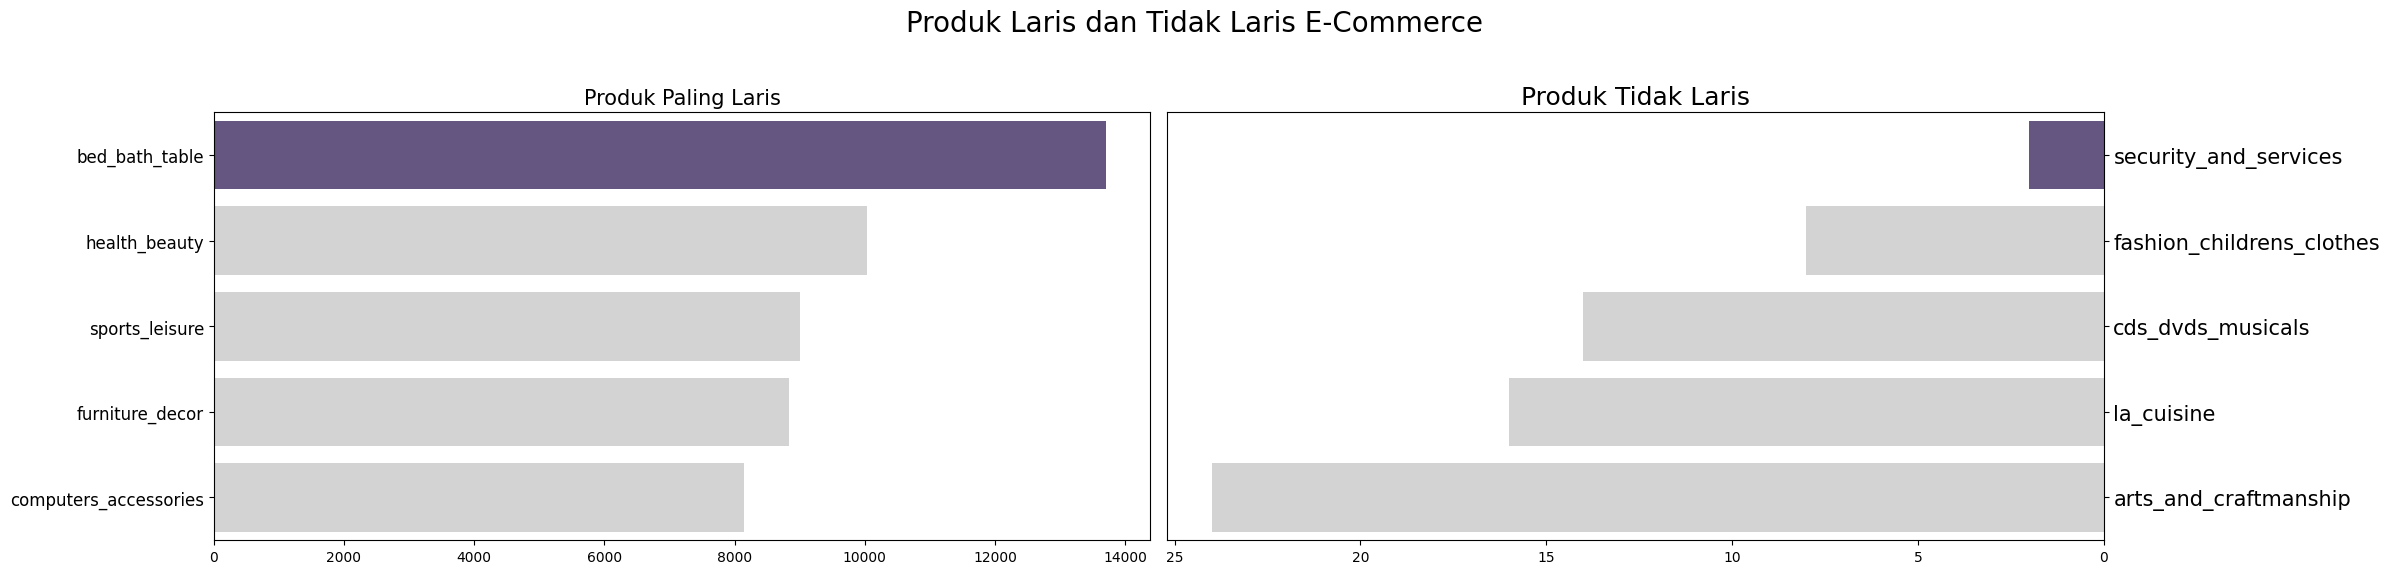

In [112]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

colors = ["#624E88", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
sns.barplot(x="products", y="product_category_name_english", data=sum_orders_df.sort_values(by="products", ascending=False).head(5), palette=colors, ax=ax[0]
)
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Produk Paling Laris", loc="center", fontsize=15)
ax[0].tick_params(axis='y', labelsize=12)

sns.barplot(x="products", y="product_category_name_english", data=sum_orders_df.sort_values(by="products").head(5), palette=colors, ax=ax[1]
)
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Produk Tidak Laris", loc="center", fontsize=18)
ax[1].tick_params(axis='y', labelsize=15)

plt.suptitle("Produk Laris dan Tidak Laris E-Commerce", fontsize=20)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

**Insight:**
- Dari bar diatas menandakan bahwa bed_bath_table adalah produk paling laris dalam penjualan ini.
- Sebaliknya security_and_services adalah produk yang tidak laris. Hal ini dipengaruhi oleh penjualan yang didapatkan.

### Kategori produk apa yang paling banyak dibeli?

In [113]:
most_product = all_df.groupby('product_category_name_english').aggregate({'order_id': 'count'}).rename(columns={"order_id": "order_count"}).sort_values(by="order_count", ascending=False).reset_index()
most_product.head()

,product_category_name_english,order_count
0,bed_bath_table,13697
1,health_beauty,10032
2,sports_leisure,9004
3,furniture_decor,8832
4,computers_accessories,8150


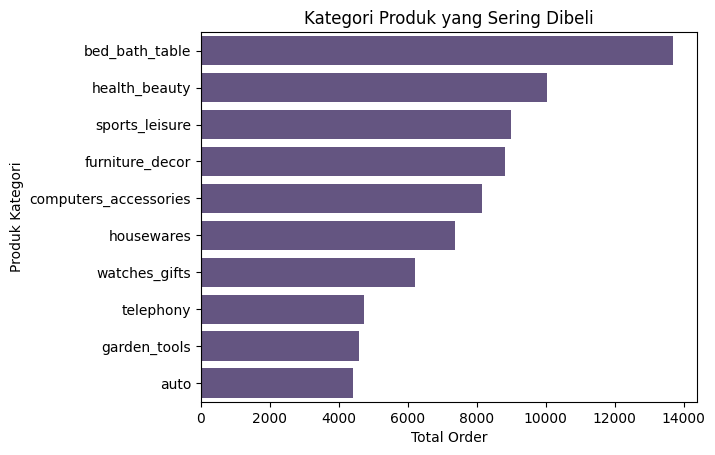

In [114]:
sns.barplot(y="product_category_name_english", x="order_count",data=most_product[:10],color="#624E88")
plt.ylabel("Produk Kategori")
plt.xlabel("Total Order")
plt.title("Kategori Produk yang Sering Dibeli")
plt.xticks(rotation="horizontal")
plt.show()

**Insight:**
- Grafik diatas menampilkan 10 most produk yang dibeli customer.
- Produk yang paling banyak dibeli adalah bed_bath_table dengan 12000 lebih.

### Bagaimana penjualan dan Revenue Produk dalam beberapa bulan terakhir?

In [117]:
monthly_orders_df = all_df.resample(rule='M', on='order_approved_at').agg({
    "order_id": "nunique",
    "payment_value" : "sum"
})
monthly_orders_df.index = monthly_orders_df.index.strftime('%B')
monthly_orders_df = monthly_orders_df.reset_index()
monthly_orders_df.rename(columns={
    "order_id": "order_count",
    "payment_value": "revenue"
}, inplace=True)
monthly_orders_df.head()

<ipython-input-117-d0fdbcd5bbf7>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_orders_df = all_df.resample(rule='M', on='order_approved_at').agg({


,order_approved_at,order_count,revenue
0,September,1,0.00
1,October,320,75985.54
2,November,0,0.00
3,December,1,19.62
4,January,760,182178.36


In [118]:
monthly_orders_df = monthly_orders_df.sort_values("order_count").drop_duplicates("order_approved_at", keep="last")
print(monthly_orders_df)

   order_approved_at  order_count     revenue
12         September         4301   927821.13
13           October         4590  1138730.07
15          December         5832  1092932.59
21              June         6164  1306785.03
22              July         6176  1334156.42
23            August         6620  1268960.54
17          February         6706  1314882.87
19             April         6778  1476502.25
20               May         7066  1545868.81
16           January         7187  1406557.66
18             March         7288  1500474.01
14          November         7395  1588308.55


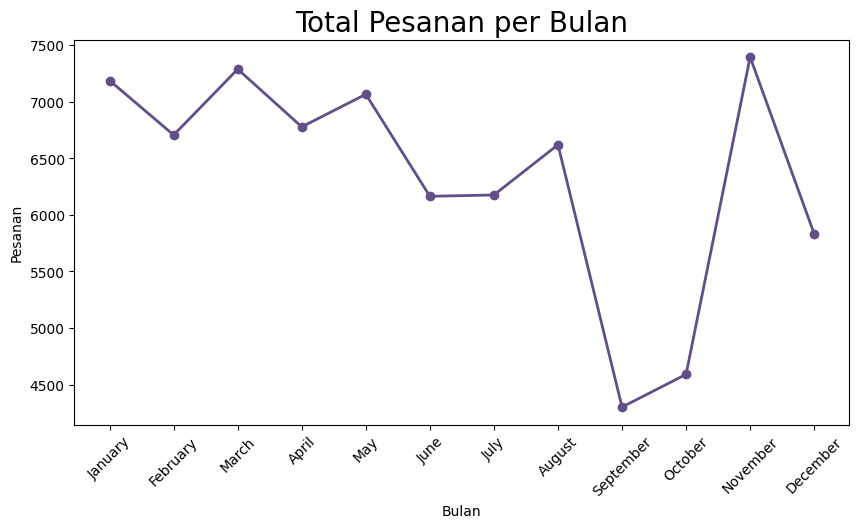

In [134]:
month_mapping = {
    "January": 1, "February": 2, "March": 3, "April": 4, "May": 5, "June": 6, "July": 7, "August": 8, "September": 9, "October": 10, "November": 11, "December": 12
}

monthly_orders_df["month_numeric"] = monthly_orders_df["order_approved_at"].map(month_mapping)
monthly_orders_df.sort_values("month_numeric", inplace=True)
monthly_orders_df.drop("month_numeric", axis=1, inplace=True)

plt.figure(figsize=(10, 5))
plt.plot(monthly_orders_df["order_approved_at"], monthly_orders_df["order_count"], marker='o', linewidth=2, color="#624E88"
)
plt.title("Total Pesanan per Bulan", loc="center", fontsize=20)
plt.xlabel("Bulan")
plt.ylabel("Pesanan")
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)
plt.show()

**Insight:**
- Order paling banyak adalah dibulan November
- Order yang mengalami penurunan terjadi di bulan september dan oktober.
- Bulan awal cukup stabil namun, diakhir menurun.

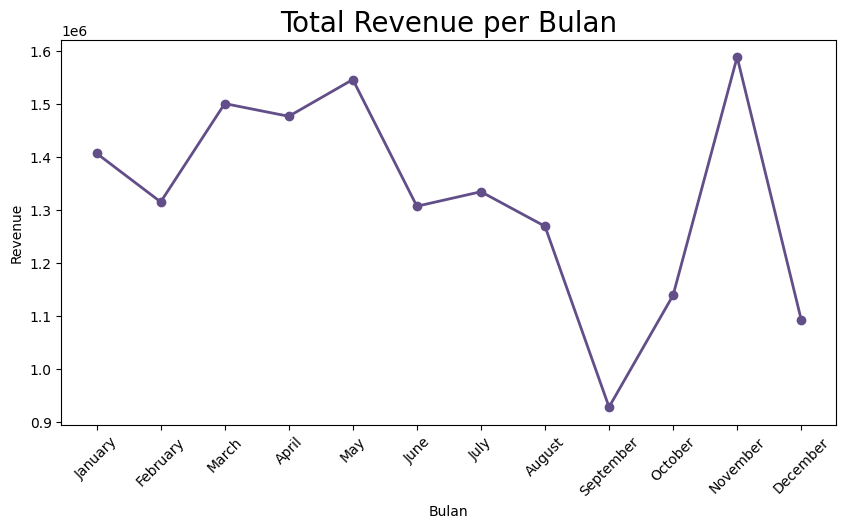

In [120]:
plt.figure(figsize=(10, 5))
plt.plot(monthly_orders_df["order_approved_at"], monthly_orders_df["revenue"], marker='o', linewidth=2, color="#624E88"
)
plt.title("Total Revenue per Bulan", loc="center", fontsize=20)
plt.xlabel("Bulan")
plt.ylabel("Revenue")
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)
plt.show()

**Insight:**
- Revenue terendah ada pada bulan september, disisi lain ada penurunan revenue pada bulan oktober dan desember.
- Untuk revenue tertinggi ada pada bulan November.
- Hasil revenue akan bergantung pada hasil order setiap bulan.

### Bagaimana Demografis Customer yang Dimiliki?

In [121]:
bystate_df = all_df.groupby(by="customer_state").customer_id.nunique().reset_index()
bystate_df.rename(columns={
    "customer_id": "customer_count"
}, inplace=True)
bystate_df = bystate_df.sort_values(by='customer_count', ascending=False)
bystate_df.head()

,customer_state,customer_count
25,SP,41746
18,RJ,12852
10,MG,11635
22,RS,5466
17,PR,5045


<ipython-input-122-c8b3fc3b4265>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="customer_count", y="customer_state", data=bystate_df, palette=palette)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When

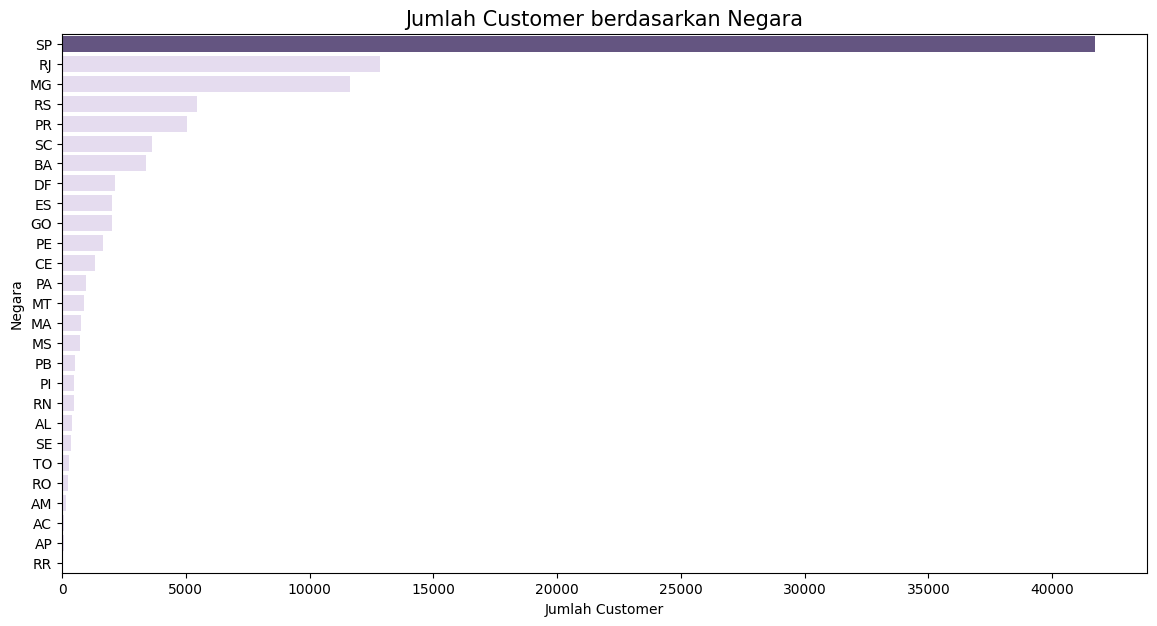

In [122]:
plt.figure(figsize=(14, 7))
most_customer_state = bystate_df.loc[bystate_df['customer_count'].idxmax(), 'customer_state']
palette = ["#624E88" if state == most_customer_state else "#E5D9F2" for state in bystate_df['customer_state']]

sns.barplot(x="customer_count", y="customer_state", data=bystate_df, palette=palette)
plt.title("Jumlah Customer berdasarkan Negara", loc="center", fontsize=15)
plt.ylabel("Negara")
plt.xlabel("Jumlah Customer")
plt.tick_params(axis='y', labelsize=10)
plt.show()

**Insight:**
- SP adalah negara yang memiliki paling banyak customer dengan lebih dari 41746.

In [124]:
bycity_df = all_df['customer_city'].value_counts().head(10)
most_customer_city = bycity_df.idxmax()
bycity_df = bycity_df.sort_values(ascending=False)
bycity_df.head()

,count
customer_city,
sao paulo,18875
rio de janeiro,8311
belo horizonte,3299
brasilia,2500
curitiba,1827


<ipython-input-125-0ce8dd8d78df>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bycity_df.index, y=bycity_df.values,
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like

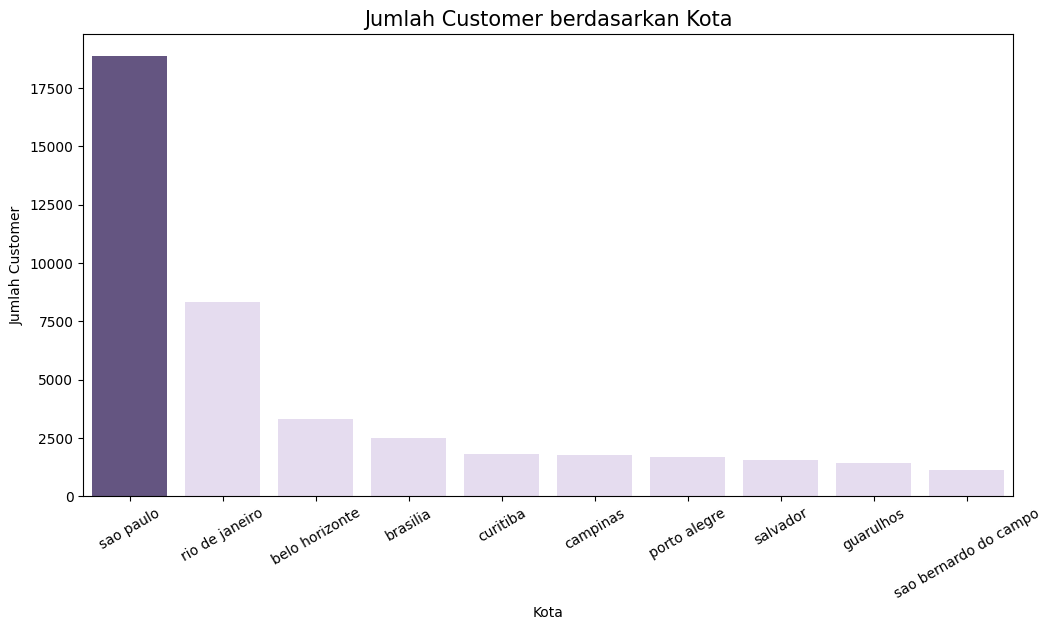

In [125]:
plt.figure(figsize=(12, 6))
sns.barplot(x=bycity_df.index, y=bycity_df.values,
            palette=["#624E88" if city == most_customer_city else "#E5D9F2" for city in bycity_df.index])

plt.title("Jumlah Customer berdasarkan Kota", loc="center", fontsize=15)
plt.xlabel("Kota")
plt.ylabel("Jumlah Customer")
plt.xticks(rotation=30, fontsize=10)
plt.show()

**Insight:**
- Sao Paulo adalah kota yang memiliki paling banyak customer dengan jumlah 18875.

### Seller kota mana yang menjual produk paling banyak?

In [126]:
most_seller = all_df.groupby('seller_city').aggregate({'order_id':'count'}).rename(columns={'order_id':'order_count'}).sort_values(by='order_count',ascending=False).reset_index()
most_seller.head()

,seller_city,order_count
0,sao paulo,29293
1,ibitinga,8373
2,curitiba,3161
3,santo andre,3149
4,sao jose do rio preto,2693


<ipython-input-127-da5e2bf361e0>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top_sellers.index, y=top_sellers.values, palette=colors)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping 

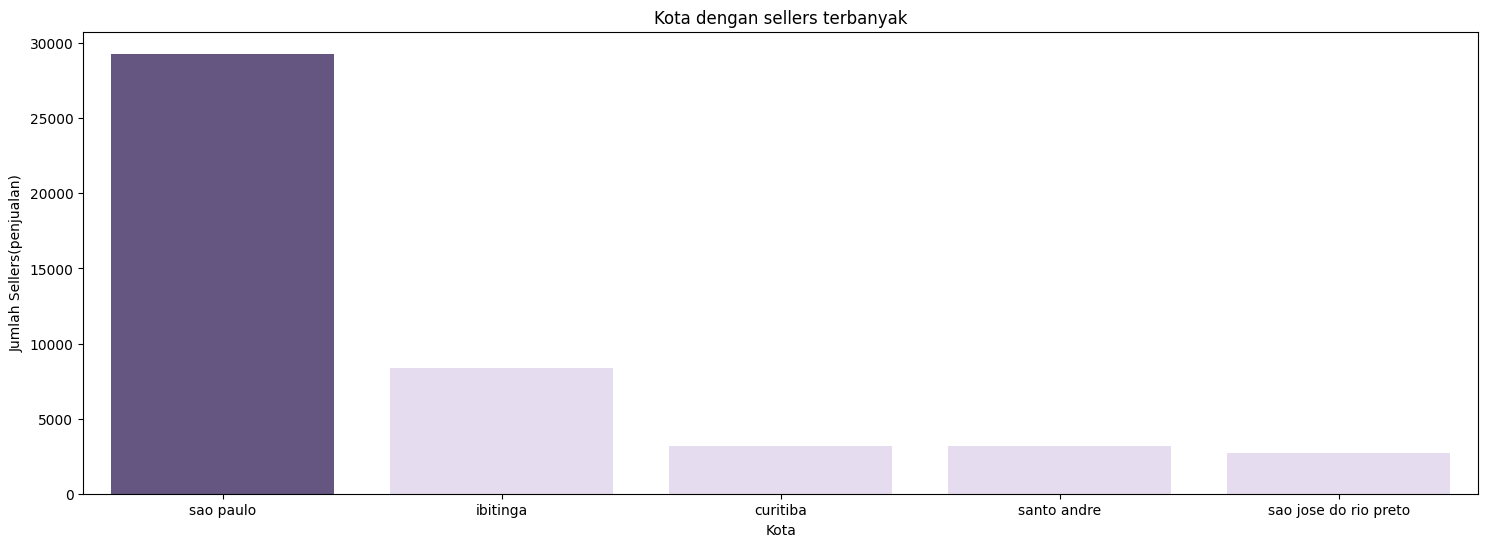

In [127]:
top_sellers = all_df['seller_city'].value_counts()[:5]

plt.figure(figsize=(18, 6))
colors = ["#624E88", "#E5D9F2", "#E5D9F2", "#E5D9F2", "#E5D9F2"]
ax = sns.barplot(x=top_sellers.index, y=top_sellers.values, palette=colors)

ax.set_title("Kota dengan sellers terbanyak")
plt.xlabel("Kota")
plt.ylabel("Jumlah Sellers(penjualan)")
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

plt.show()

**Insight:**
- Seller di kota Sao Paulo adalah yang terbanyak dalam menjual produk dengan jumlah 29293.

## Analisis Lanjutan (Opsional)

In [132]:
# Mengonversi ke datetime
orders_df['order_approved_at'] = pd.to_datetime(orders_df['order_approved_at'], errors='coerce')
orders_df = orders_df.dropna(subset=['order_approved_at'])

#Nilai RFM
rfm_df = all_df.groupby(by="customer_id", as_index=False).agg({
    "order_approved_at": "max",
    "order_id": "nunique",
    "payment_value": "sum"
})
rfm_df.columns = ["customer_id", "max_order_timestamp", "frequency", "monetary"]

# RFM day
rfm_df["max_order_timestamp"] = rfm_df["max_order_timestamp"].dt.date
recent_date = orders_df["order_approved_at"].dt.date.max()
rfm_df = rfm_df.dropna(subset=["max_order_timestamp"])
rfm_df["recency"] = rfm_df["max_order_timestamp"].apply(lambda x: (recent_date - x).days)
rfm_df.drop("max_order_timestamp", axis=1, inplace=True)
rfm_df.head()


<ipython-input-132-4db730d4494d>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm_df["recency"] = rfm_df["max_order_timestamp"].apply(lambda x: (recent_date - x).days)
<ipython-input-132-4db730d4494d>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm_df.drop("max_order_timestamp", axis=1, inplace=True)


,customer_id,frequency,monetary,recency
0,00012a2ce6f8dcda20d059ce98491703,1,114.74,293
1,000161a058600d5901f007fab4c27140,1,67.41,414
2,0001fd6190edaaf884bcaf3d49edf079,1,195.42,552
3,0002414f95344307404f0ace7a26f1d5,1,179.35,382
4,000379cdec625522490c315e70c7a9fb,1,107.01,152


<ipython-input-133-97c794ad23de>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="recency", x="customer_id", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packa

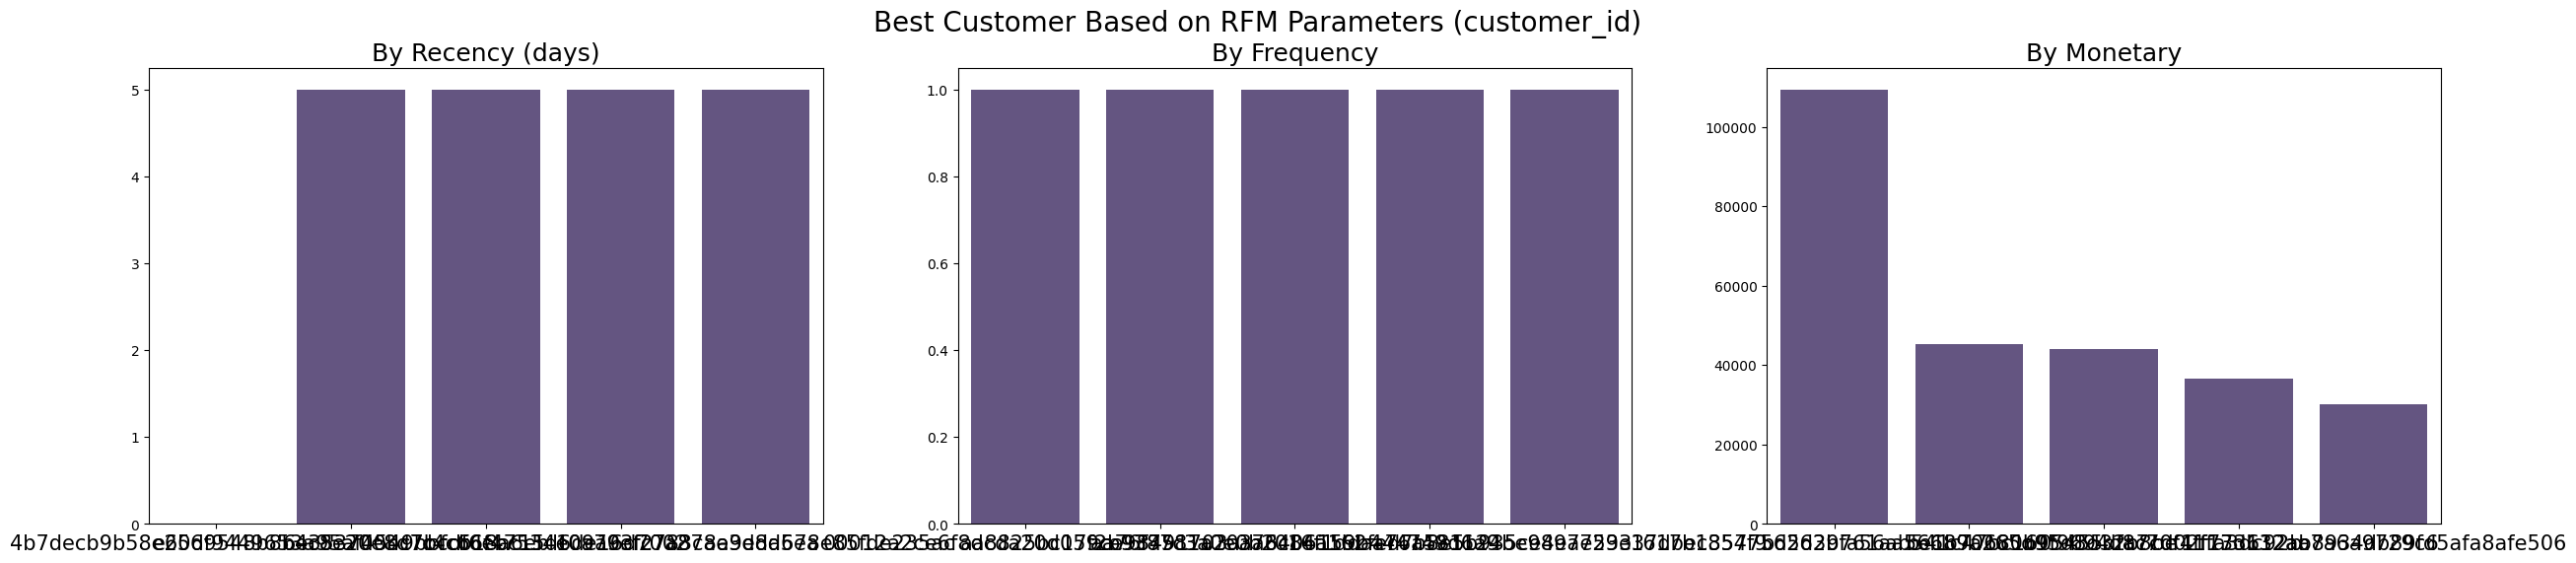

In [133]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))

colors = ["#624E88", "#624E88", "#624E88", "#624E88", "#624E88"]

sns.barplot(y="recency", x="customer_id", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis ='x', labelsize=15)

sns.barplot(y="frequency", x="customer_id", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15)

sns.barplot(y="monetary", x="customer_id", data=rfm_df.sort_values(by="monetary", ascending=False).head(5), palette=colors, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15)

plt.suptitle("Best Customer Based on RFM Parameters (customer_id)", fontsize=20)
plt.show()

**Insight:**
- Visualisasi diatas akan menggambarkan bahwa customer yang melakukan transaksi.
- Kita bisa melihat terakhir kali customer melakukan transaksi melalui tabel By Recency(days).
- Mengetahui seberapa sering pelanggan melakukan transaksi melalui tabel ny Frequency.
- Mengetahui pendapatan atau revenue yang didapat dari customer.
-Informasi ini akan digunakan untuk evaluasi dalam pengembangan e-commerce.

## Conclusion

### Produk apa saja yang paling laris dan tidak laris dalam penjulan?

Dalam visualisasi yang telah digambarkan, produk yang paling laris adalah beld_bath_table dengan penjualan sebanyak 12000, sedangkan untuk produk yang tidak laris atau kurang laris adalah security_and_services yang bahkan penjulaannya kurang dari 5, namun mengingat bahwa dataset ini terdiri dari ribuan bahkan puluhan ribu produk alangkah sebaiknya untuk e-commerce lebih gencar dalam mempromosikan produk-produk yang kurang diminati dengan membuat inovasi baru terhadap produk.

### Bagaimana penjualan dan Revenue Produk dalam beberapa bulan terakhir?

Banyak nya produk yang di approved atau disetujui untuk order dan revenue per bulan cenderung stabil dibulan januari hingga mei, penjualan dan revenue mengalami sedikit penurunan saat bulan juni hingga juli, namun dapat naik kembali di bulan agustus. Meskipun naik, penurunan drastis dialami dibulan september, namun kembali naik lagi di bulan oktober. Puncak kenaikan ada pada bulan November, dan mengalami sedikit penurunan di bulan Desember.
Dengan adanya visualisasi ini, pihak e-commerce akan mengetahui bagaimana revenue yang dimiliki per-bulan, oleh karena itu disarankan untuk memberbaiki sistem approved order agar mampu mengoptimalkan transaksi.

### Bagaimana Demografis Customer yang Dimiliki?

Cusomer di dominasi dari Negara SP dengan 40000 lebih customer. Sedangkan untuk di Negara RR, AP, AC, customer masih terbilang sedikit jika dibandingkan dengan negara lain.
Customer di kota sao paulo sangatlah banyak, adanya kesenjangan antara kota sao paulo dengan 4 kota dibawahnya menunjukkan bahwa customer tidak terlalu merata dan masih di dominasi oleh satu kota.
untuk itu diharapkan e-commerce mampu mengembangkan bisnisnya lebih luas lagi dengan mengadakan promosi di beberapa Negara dan memaksimalkan di kota.

### Seller kota mana yang menjual produk paling banyak?

Visualisasi ini menggambarkan top 5 dari seller city atau kota penjual dengan value penjualan terbanyak. Kota Sao Paulo adalah kota dengan penjualan terbanyak, oleh karena itu, dengan adanya grafik analisa ini sebagai bentuk untuk menunjang penjualan di daerah-daerah yang menjadi target dari e-commerce selain itu, hal ini dapat digunakan sebagai pemanfaatan penunjang kebutuhan bisnis agar selalu maju.